In [1]:
import os
# This line for the Windows
os.add_dll_directory(r"C:\Users\PC\Desktop\openslide-win64-20230414\openslide-win64-20230414\bin")
import datastructure.dataset as dataset
import arguments.setting as setting

In [2]:
data_directories = ["../hamamatsu"]
working_directory = "../workdir/"
csv_file = "../patients.csv"
qupath_project_file = "../qupath_project/project.qpproj"
s = setting.Setting(data_directories, csv_file, working_directory, qupath_project_file)
data = dataset.Dataset(s)

Initial 1560 patients
Resulting in 16 patients
Resulting in 16 patients
Resulting in 16 patients
Resulting in 16 patients


In [ ]:
total_tiles = 0
for patient in data.train_set[0]:
    patient.load_wsis()
    for wsi in patient.get_wsis()[0]:
        total_tiles += len(wsi.tiles[0])
print(total_tiles)

In [4]:
import numpy as np

def min_max_image(img):
    img_min = np.min(img, axis = (0, 1))
    img_max = np.max(img, axis = (0, 1))
    return (img - img_min) / (img_max - img_min)

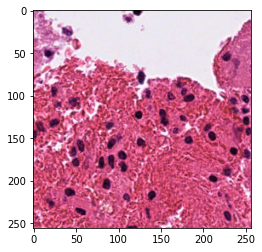

In [5]:
import matplotlib.pyplot as plt

patient = data.get_test_set()[0][0]
patient.load_wsis()
wsi = patient.get_wsis()[0][0]
wsi.load_wsi()
plt.imshow(min_max_image(wsi.tiles[0][0].get_image(wsi.image)))

In [6]:
project = wsi.get_qupath_project()

In [7]:
img = min_max_image(wsi.tiles[0][0].get_image(wsi.image))

from histomicstk.preprocessing.color_normalization import reinhard
from histomicstk.saliency.tissue_detection import (
    get_slide_thumbnail, get_tissue_mask)

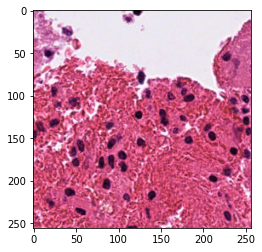

In [8]:
plt.imshow(min_max_image(img))

In [ ]:
n_classes = len(wsi.qupath_project.path_classes) - 1

for index, c in enumerate(wsi.qupath_project.path_classes[:-1]):
    print(f"Class {c.name} returned as the channel {(index - 1 - n_classes) % n_classes} in MOTHI")

In [ ]:
wsi.qupath_project.path_classes

In [ ]:
# NOTE: MOTHI shifts the given classes by one to the left.
# Can see that tumor is in the first list in the upper list. 
# Also can check the annotations of the B128-19_HE_Hamamatsu_40x.ndpi from the QuPath project
# But here, it is retrieved as the last element :/

arr = wsi.qupath_project.get_tile_annot_mask(20, (0, 0), (165, 144), 8, multichannel = True)

fig, ax = plt.subplots(4, 4, figsize = (10, 10))
for i in range(16):
    ax[i // 4][i % 4].imshow(arr[i])

In [ ]:
tiles_with_masks = []
label_index = 2 # Class Blutung

for tile in wsi.tiles[0]:
    annotation = tile.get_annotation(wsi)
    if annotation[label_index].max() != 0:
        tiles_with_masks.append(tile)

In [ ]:
# Explicit example of getting the correct tiles

fig, axes = plt.subplots(1, 2)
axes[0].imshow(min_max_image(tiles_with_masks[0].get_image(wsi.image)))
axes[1].imshow(min_max_image(tiles_with_masks[0].get_annotation(wsi))[2])

In [15]:
tiles_with_masks = []
label_index = 5 # Class Falten 

for tile in wsi.tiles[0]:
    annotation = tile.get_annotation(wsi)
    if annotation[label_index].max() != 0:
        tiles_with_masks.append(tile)

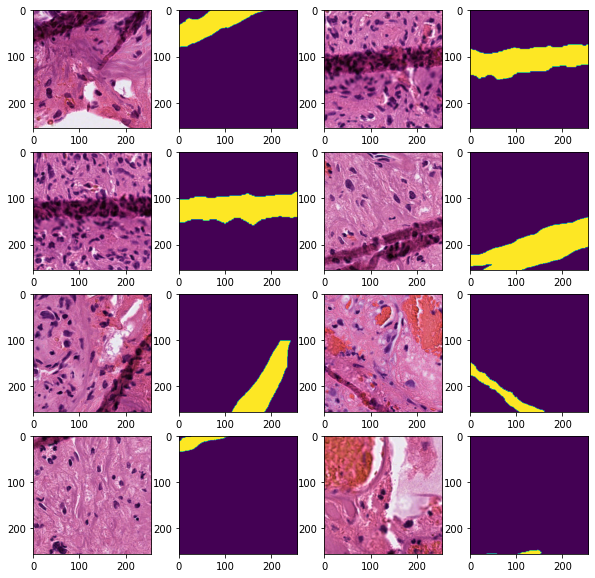

In [16]:
import random

fig, ax = plt.subplots(4, 4, figsize = (10, 10))
for i in range(4):
    tile1 = random.choice(tiles_with_masks)
    tile2 = random.choice(tiles_with_masks)
    ax[i][0].imshow(min_max_image(tile1.get_image(wsi.image)))
    ax[i][1].imshow(tile1.get_annotation(wsi)[label_index], vmin = 0, vmax = 1)
    ax[i][2].imshow(min_max_image(tile2.get_image(wsi.image)))
    ax[i][3].imshow(tile2.get_annotation(wsi)[label_index], vmin = 0, vmax = 1)

In [15]:
from pathlib import Path
import os

def update_qupath_paths(qupath_project, file_folder_path, delete_not_found = False):
    uri2uri = {}
    images = os.listdir(file_folder_path)
    to_be_deleted = []
    for image in qupath_project.images:
        if image.image_name in images:
            old_path = image.uri
            new_path = "file:/" + os.path.join(file_folder_path, image.image_name).replace("\\", "/")
            uri2uri[old_path] = new_path
            print(f"Path of the {image.image_name} has been changed!")
        elif delete_not_found:
            to_be_deleted.append(image)
            print(f"{image.image_name} has been deleted!")
    qupath_project.update_image_paths(uri2uri = uri2uri)
    for image in to_be_deleted:
        qupath_project.remove_image(image)
    qupath_project.save()

In [16]:
update_qupath_paths(project, r"C:\Users\PC\Desktop\Max_Pathology\hamamatsu", delete_not_found = True)

Path of the B7-18_HE_Hamamatsu_40x.ndpi has been changed!
Path of the B9-18_HE_Hamamatsu_40x.ndpi has been changed!
Path of the B11-18_HE_Hamamatsu_40x.ndpi has been changed!
Path of the B17-19_HE_Hamamatsu_40x.ndpi has been changed!
Path of the B20-16_HE_Hamamatsu_40x.ndpi has been changed!
Path of the B27-19_HE_Hamamatsu_40x.ndpi has been changed!
Path of the B30-18_HE_Hamamatsu_40x.ndpi has been changed!
Path of the B35-18_1_HE_Hamamatsu_40x.ndpi has been changed!
Path of the B35-18_2_HE_Hamamatsu_40x.ndpi has been changed!
Path of the B36-17_1_HE_Hamamatsu_40x.ndpi has been changed!
Path of the B36-17_2_HE_Hamamatsu_40x.ndpi has been changed!
Path of the B37-17_HE_Hamamatsu_40x.ndpi has been changed!
Path of the B42-17_HE_Hamamatsu_40x.ndpi has been changed!
Path of the B68-18_HE_Hamamatsu_40x.ndpi has been changed!
Path of the B85-17_HE_Hamamatsu_40x.ndpi has been changed!
Path of the B100-17_HE_Hamamatsu_40x.ndpi has been changed!
Path of the B115-17_HE_Hamamatsu_40x.ndpi has bee

In [352]:
from datastructure import dataset_torch
import torch
import numpy as np

@torch.no_grad()
def infer_qupath(img_id, model, qupath_project, norm_function = None, level = 2, 
                 n_channels = 1, patch_size = 256, device = "cuda"):
    image = qupath_project.images[img_id]
    downsample, width, height = image.downsample_levels[level].values()
    max_width, max_height = image.width, image.height
    print(max_width, max_height)
    annotations = np.zeros((height, width, n_channels))
                
    for x in range(0, width, patch_size):
        for y in range(0, height, patch_size):
            tile_width = min(patch_size, width - x)
            tile_height = min(patch_size, height - y)
            tile = qupath_project.get_tile(img_id, (x * (2 ** level), y * (2 ** level)), 
                                           size = (tile_width,
                                                   tile_height),
                                           downsample_level = level)
            if norm_function:
                tile = norm_function(tile)
            tile_model_sample = torch.tensor(np.transpose(tile[None], [0, 3, 1, 2]), dtype = torch.float).to(device)
            inter = model(tile_model_sample).cpu().numpy()
            logits = inter[0]
            annotations[y : y + tile_height, x : x + tile_width] = (np.transpose(logits, [1, 2, 0]) > 0).astype(int)
    return image, annotations

In [334]:
# This Part only for Testing rn. We can load the model and visualize our models predictions using the upper function
from models import unet

import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.cuda.empty_cache()
model = unet.UNet(3,
                      1,
                      5,
                      6,
                      True,
                      True,
                      'upconv')

model.to(device)

<All keys matched successfully>